# ------------------------------------Titanic Project----------------------------------------------

---------------------------------------------------------------------------------------------------------------------

## Problem Statement:

**The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.**

##### **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Variable-----Definition------Key**

------------------------------------------------------------------------------
survival  -	Survival	-   0 = No, 1 = Yes

pclass	  - Ticket class	-   1 = 1st, 2 = 2nd, 3 = 3rd

sex	     -    Sex	

Age  	 - Age in years	

sibsp	 - No. of siblings / spouses aboard the Titanic

parch	 - No. of parents / children aboard the Titanic	

ticket	 - Ticket number

fare	-  Passenger fare	

cabin	-  Cabin number	

embarked  - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

-------------------------------------------------------------------------------------------

# Variable Notes

**pclass:** A proxy for socio-economic status (SES)

1st = Upper , 
2nd = Middle ,
3rd = Lower .

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

---------------------------------------------------------------------------------------------------------------------


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S


# Checking Null Value In The DataFrame

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**We can see that the Null value is present in the Age,Cabin and Embarked columns**

<AxesSubplot:>

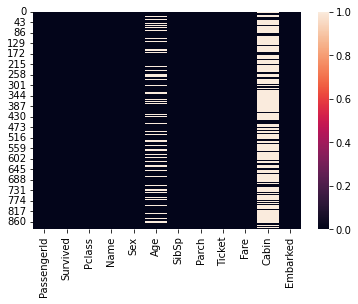

In [8]:
sns.heatmap(df.isnull())

**In cabin we have Huge Null values but this columns is irrelevent to us for training so we will drop this columns from the dataset**

In [9]:
df = df.drop(['Cabin'],axis=1)

# dropped cabin from the dataset

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Now Lets fill NaN Values

In [11]:
# Now Lets remove the Outliers By Fillna method and we will use mean bcz data is continious in Age 

df['Age']= df['Age'].fillna(df['Age'].mean())

In [12]:
# Now Lets remove the Outliers By Fillna method and we will use mode bcz data is catagorical in Embarked 

df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

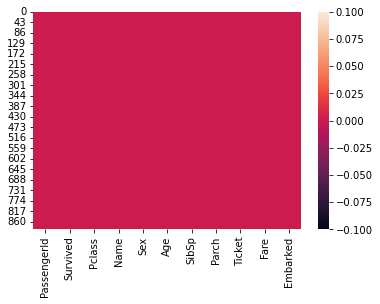

In [14]:
sns.heatmap(df.isnull())

###### Now all the null value have been Removed 

# Checking Data types of the columns

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

###### This is a regression Problem bcz the survived column is in int64 format

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
#  Lets Remove Duplicates Values from the dataframe

df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.shape

(891, 11)

###### Its  still the same as it was earlier so no duplicates we present in the dataframe

# Exploratory Data Analysis (EDA)

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>A. Univariate Analysis <h2>


<AxesSubplot:xlabel='Survived', ylabel='count'>

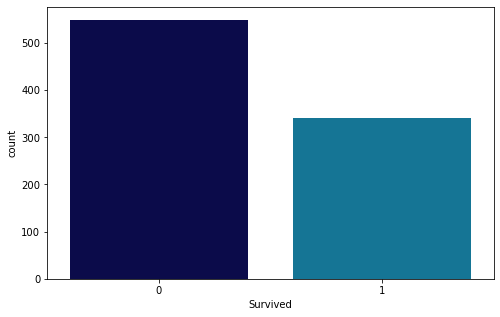

In [82]:
plt.figure(figsize=(8,5))
sns.countplot('Survived',data=df,palette='ocean')

In [21]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

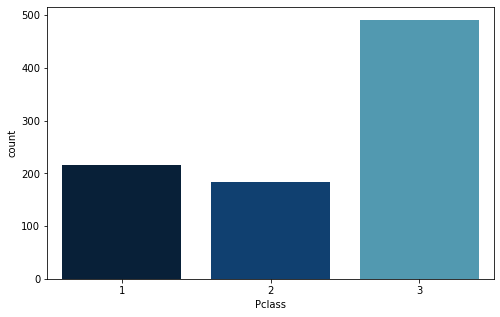

In [22]:
plt.figure(figsize=(8,5))
sns.countplot('Pclass',data=df,palette='ocean')

**The class of passenger that was maximum on the ship was 3rd class**

In [23]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='count'>

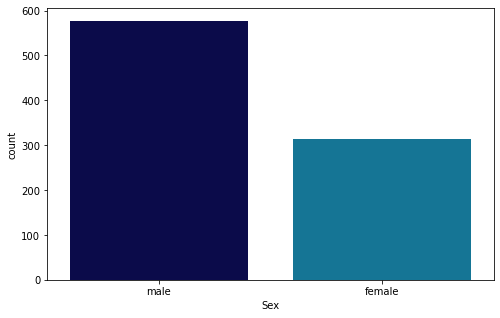

In [24]:
plt.figure(figsize=(8,5))
sns.countplot('Sex',data=df,palette='ocean')

###### Male passengers boarded in maximum number than to female passenger

In [25]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

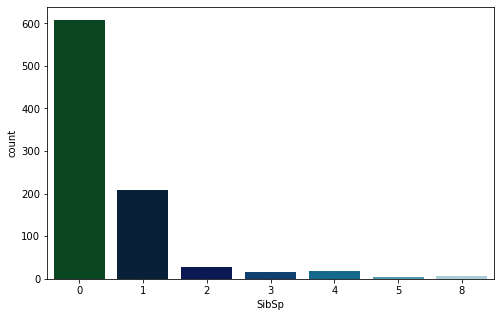

In [26]:
plt.figure(figsize=(8,5))
sns.countplot('SibSp',data=df,palette='ocean')

###### The maximum passenger that boarded were having 0 sibling and spouses

<AxesSubplot:xlabel='Parch', ylabel='count'>

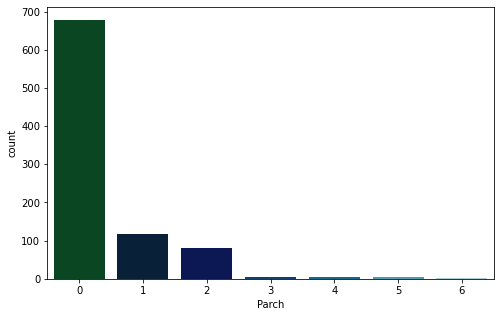

In [27]:
plt.figure(figsize=(8,5))
sns.countplot('Parch',data=df,palette='ocean')

###### The maximum passenger that boarded were having No parents and childrens on the ship ..Or U can say Maximum were Individual Travellers

<AxesSubplot:xlabel='Embarked', ylabel='count'>

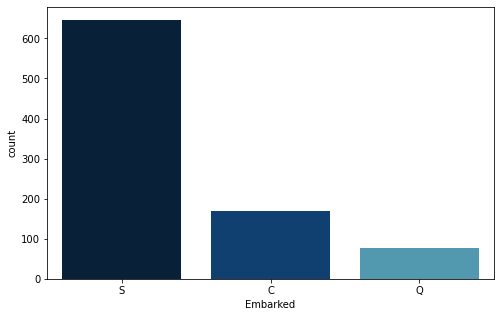

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('Embarked',data=df,palette='ocean')

###### The maximum people Embaeked from S = Southampton and least were from Q = Queenstown

<h2 style='text-align:center;font-size:40px;background-color:CRIMSON;border:30px;color:white'>B. Bivariate Analysis <h2>


In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

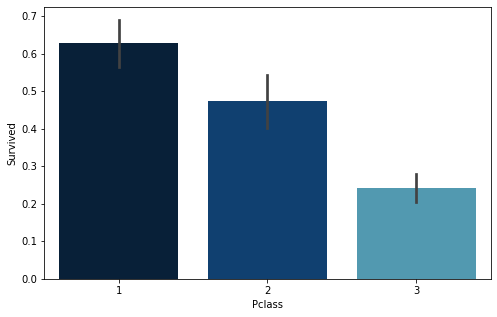

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y='Survived',x='Pclass',data=df,palette='ocean')

###### The Maximum people who survived were from 1st class and the least people who survived were from 3rd class bcz 3rd class is situated at the bottom of the ship

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

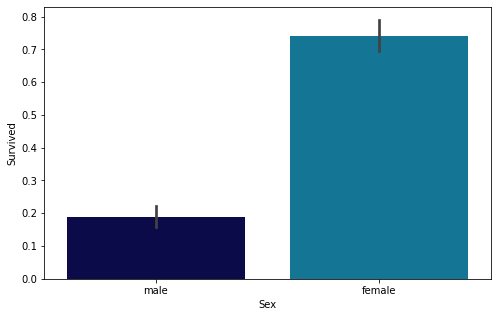

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex',y='Survived',data=df,palette='ocean')

###### The Maximum people who survived belongs to Sex Female and the least were Males

<AxesSubplot:xlabel='Age', ylabel='Survived'>

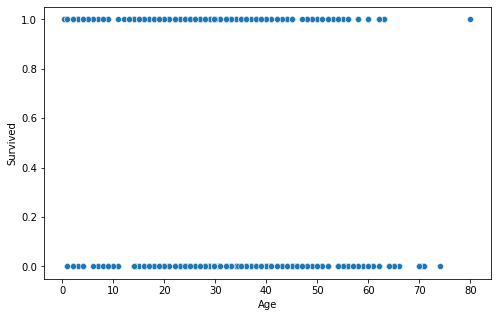

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Survived',data=df,palette='ocean')

###### We can see That there is a equall distribution between Age and survived at the range of 11 to 48 ..

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

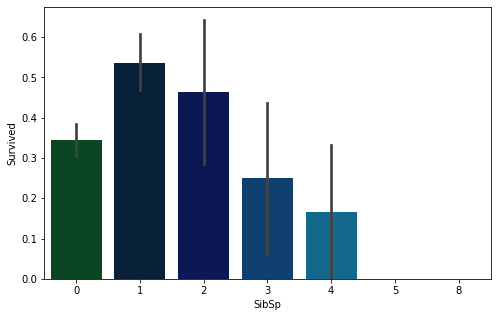

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='SibSp',y='Survived',data=df,palette='ocean')

###### Passengers who were having 1 sibling and spouses survived the most and 5 & 8 were the least..

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

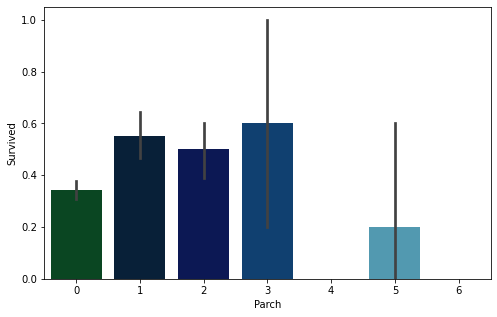

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Parch',y='Survived',data=df,palette='ocean')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

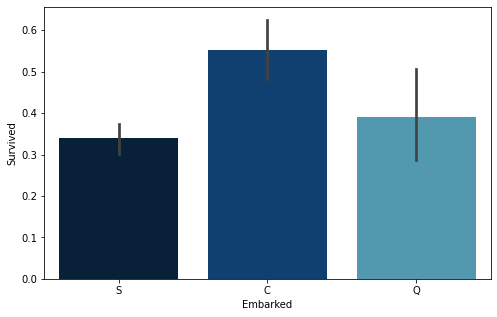

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='Embarked',y='Survived',data=df,palette='ocean')

###### The maximum people tht survived were from C = Cherbourg and the least were from S = Southampton

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

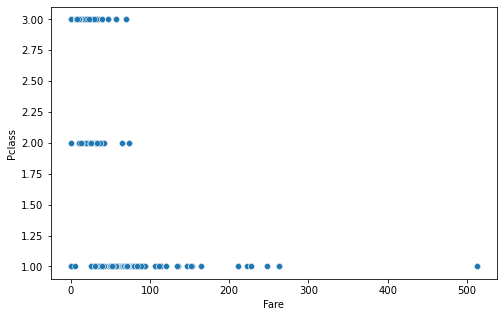

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Fare',y='Pclass',data=df,palette='ocean')

###### We can see that the maximum salary were of the people from 1st Class ,than 2nd and 3rd ..

<h2 style='text-align:center;font-size:40px;background-color:CRIMSON;border:30px;color:white'>C. Multivariate Analysis <h2>


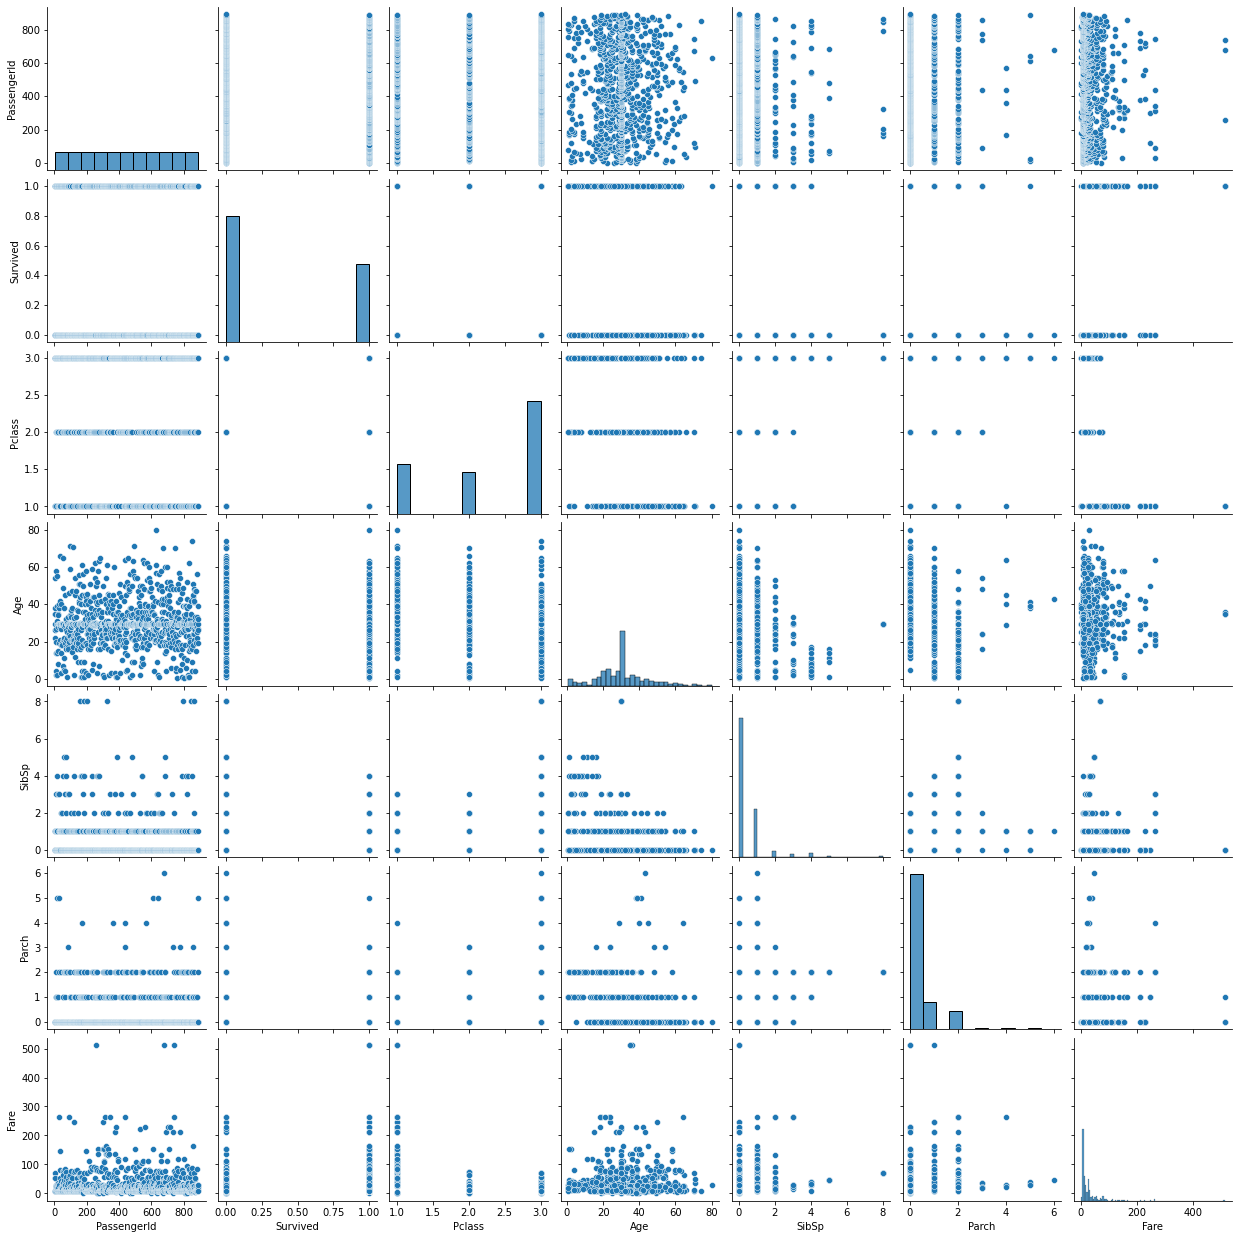

In [37]:
sns.pairplot(df)

###### Here we can see all the plotting at the single place only 

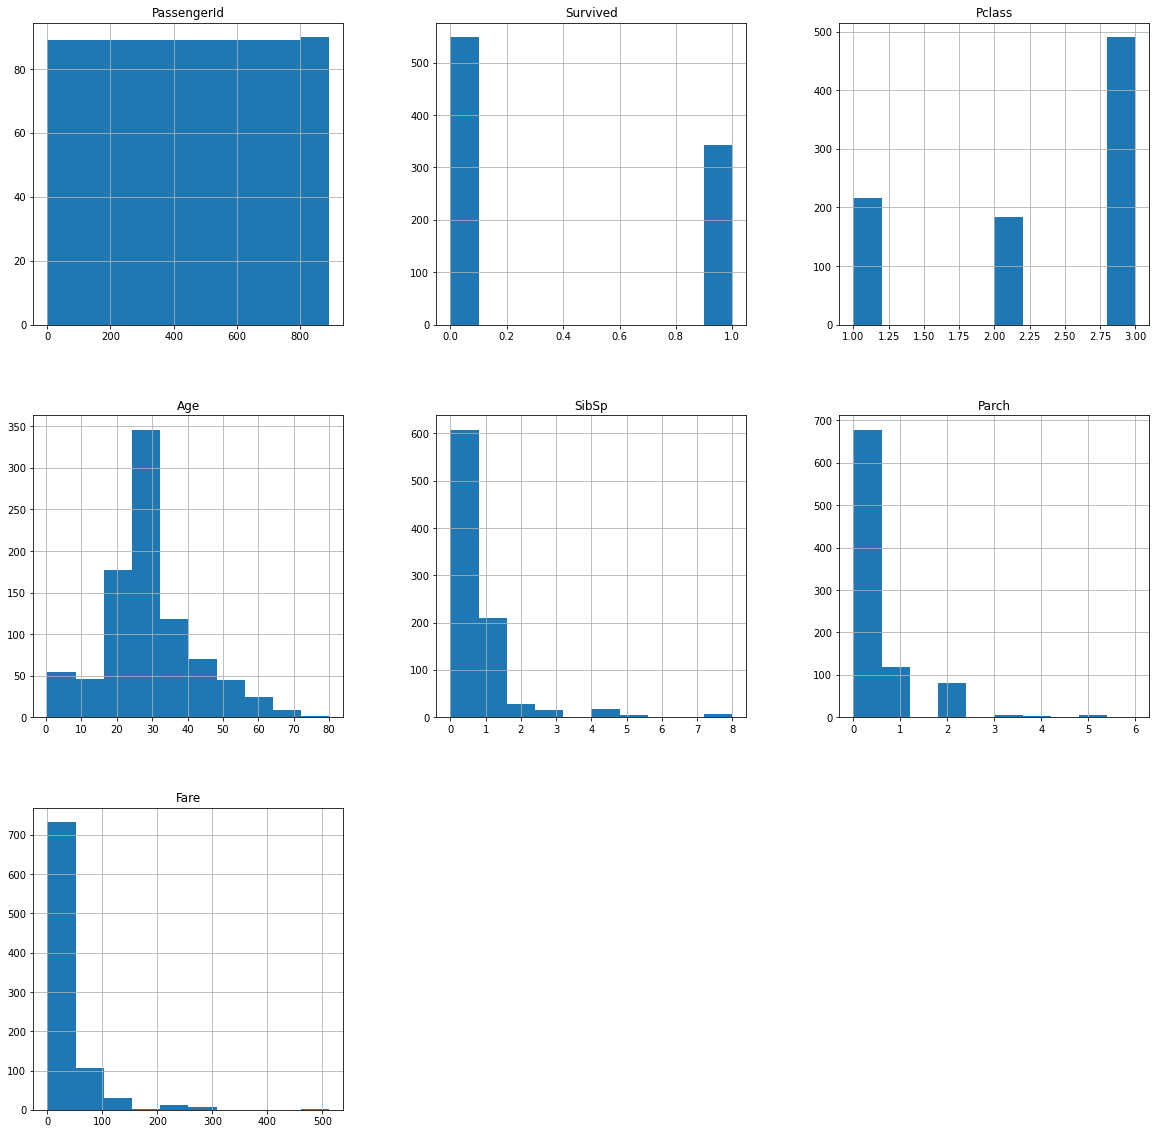

In [38]:
df.hist(bins=10, figsize=(20,20))
plt.show()

###### In age.Sibsp,Parch and fare have skewness present

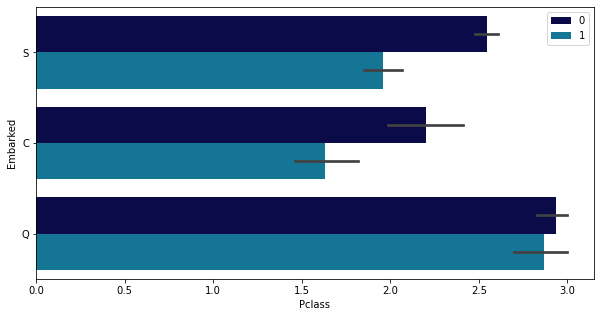

In [39]:
plt.figure(figsize=(10,5))
sns.barplot('Pclass','Embarked',hue='Survived',data=df,palette='ocean')
plt.legend()

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'> CORRELATION <h2>

In [40]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

###### We can see here that there are lot of Negatively correlated Columns present in the dataframe

<AxesSubplot:>

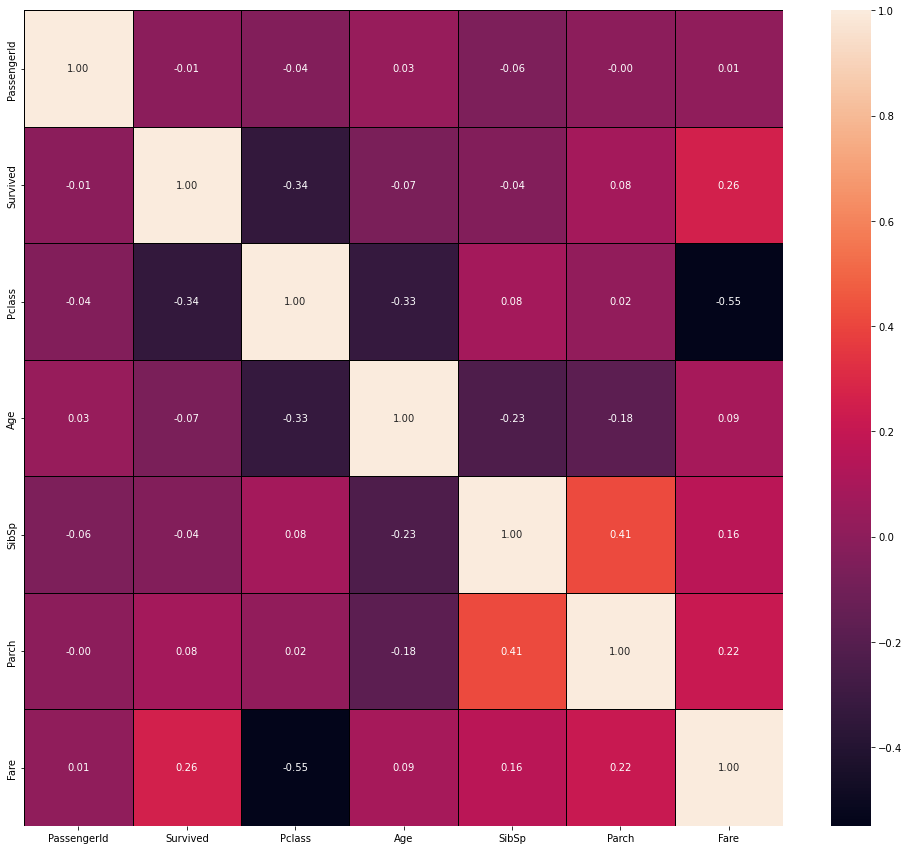

In [43]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

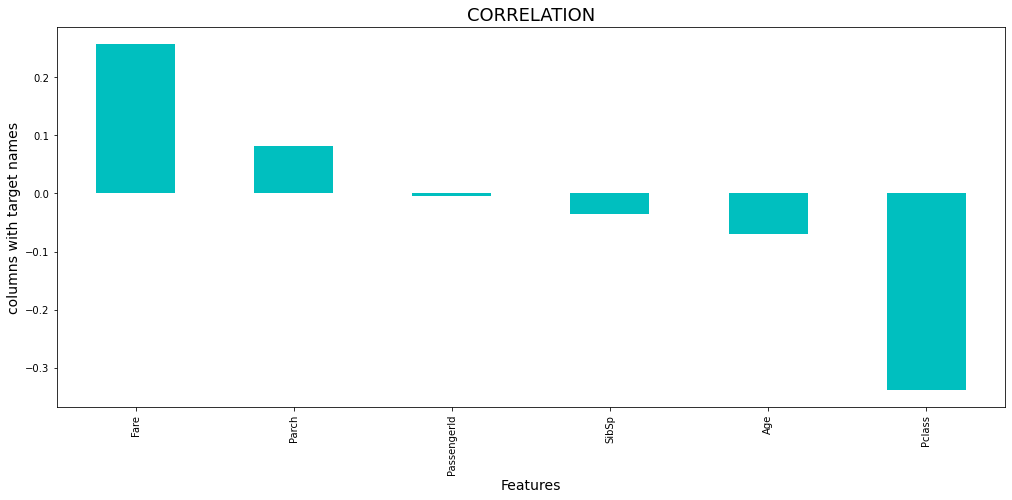

In [44]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

###### Here we can clearly see two of the columns having negative relationship, But there is no Multicollinearity present here bcz all the columns are differently correlated


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'> DESCRIPTIVE STATISTICS <h2>


In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

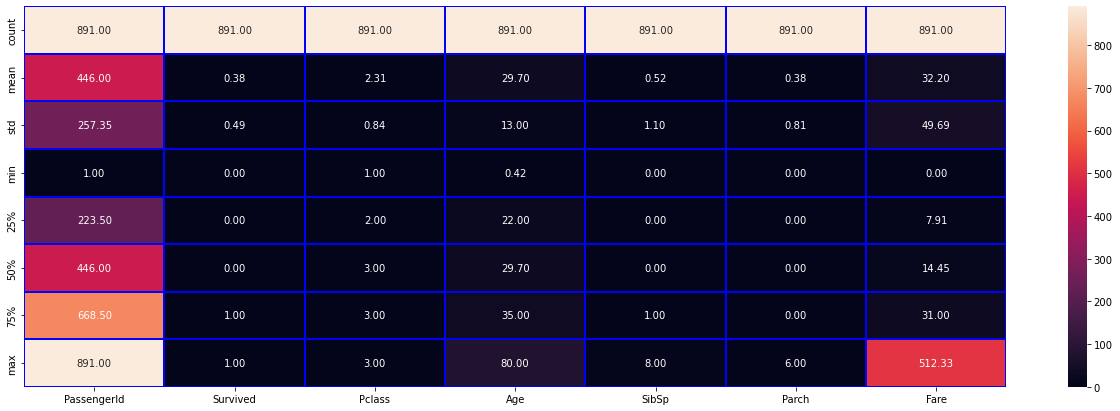

In [46]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f")

##### Outcome of describe() of dataset :-
**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

**Total number rows and column in dataset:-**

**Rows :- 891**

**columns :- 11**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.8+ KB


# Now Lets Check Outliers 1st

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


###### But Before This lets drop the columns which are not of any  use :-

In [50]:
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Survived        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Pclass       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Age          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
SibSp        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Parch          AxesSubplot(0.125,0.518913;0.168478x0.16413)
Fare        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

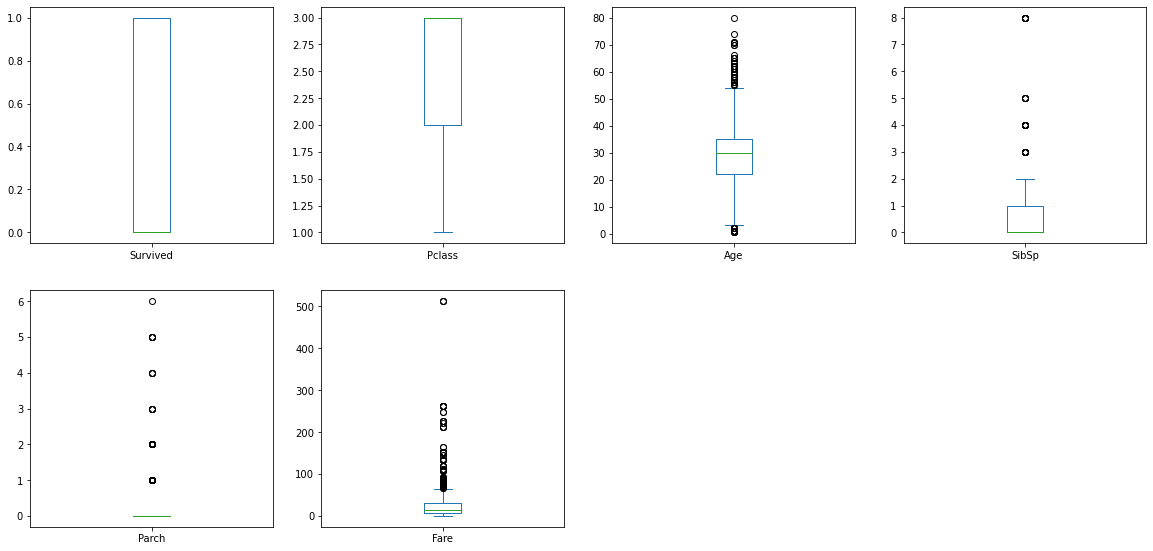

In [51]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

##### WE CAN SEE THAT THE OUTLIERS ARE PRESENT IN AGE,SIBSP,PARCH AND FARE -- SO WE ARE GONNA TREAT IT 

## We can see some catagorical data present so lets convert it 1st ..

In [52]:
from sklearn.preprocessing import LabelEncoder

#Lets use label Encoder for both Training and testing data to convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['Sex','Embarked']

for i in Input:
    df[i] = le.fit_transform(df[i])
    


In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


---------------------------------------------------------------

## Now Lets Delete the columns which are Negaively corrlated to target variable

In [54]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

###### Some of the columns are already deleted bcz they were irrelevent columns and were of no use for training purpose

In [55]:
# So lets drop only Sex columns bcz we cannot all the columns ,we will be in short of data's

df=df.drop(["Sex"],axis=1)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,0,3,35.0,0,0,8.0500,2


# Now Lets Check Skewness Again

In [56]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

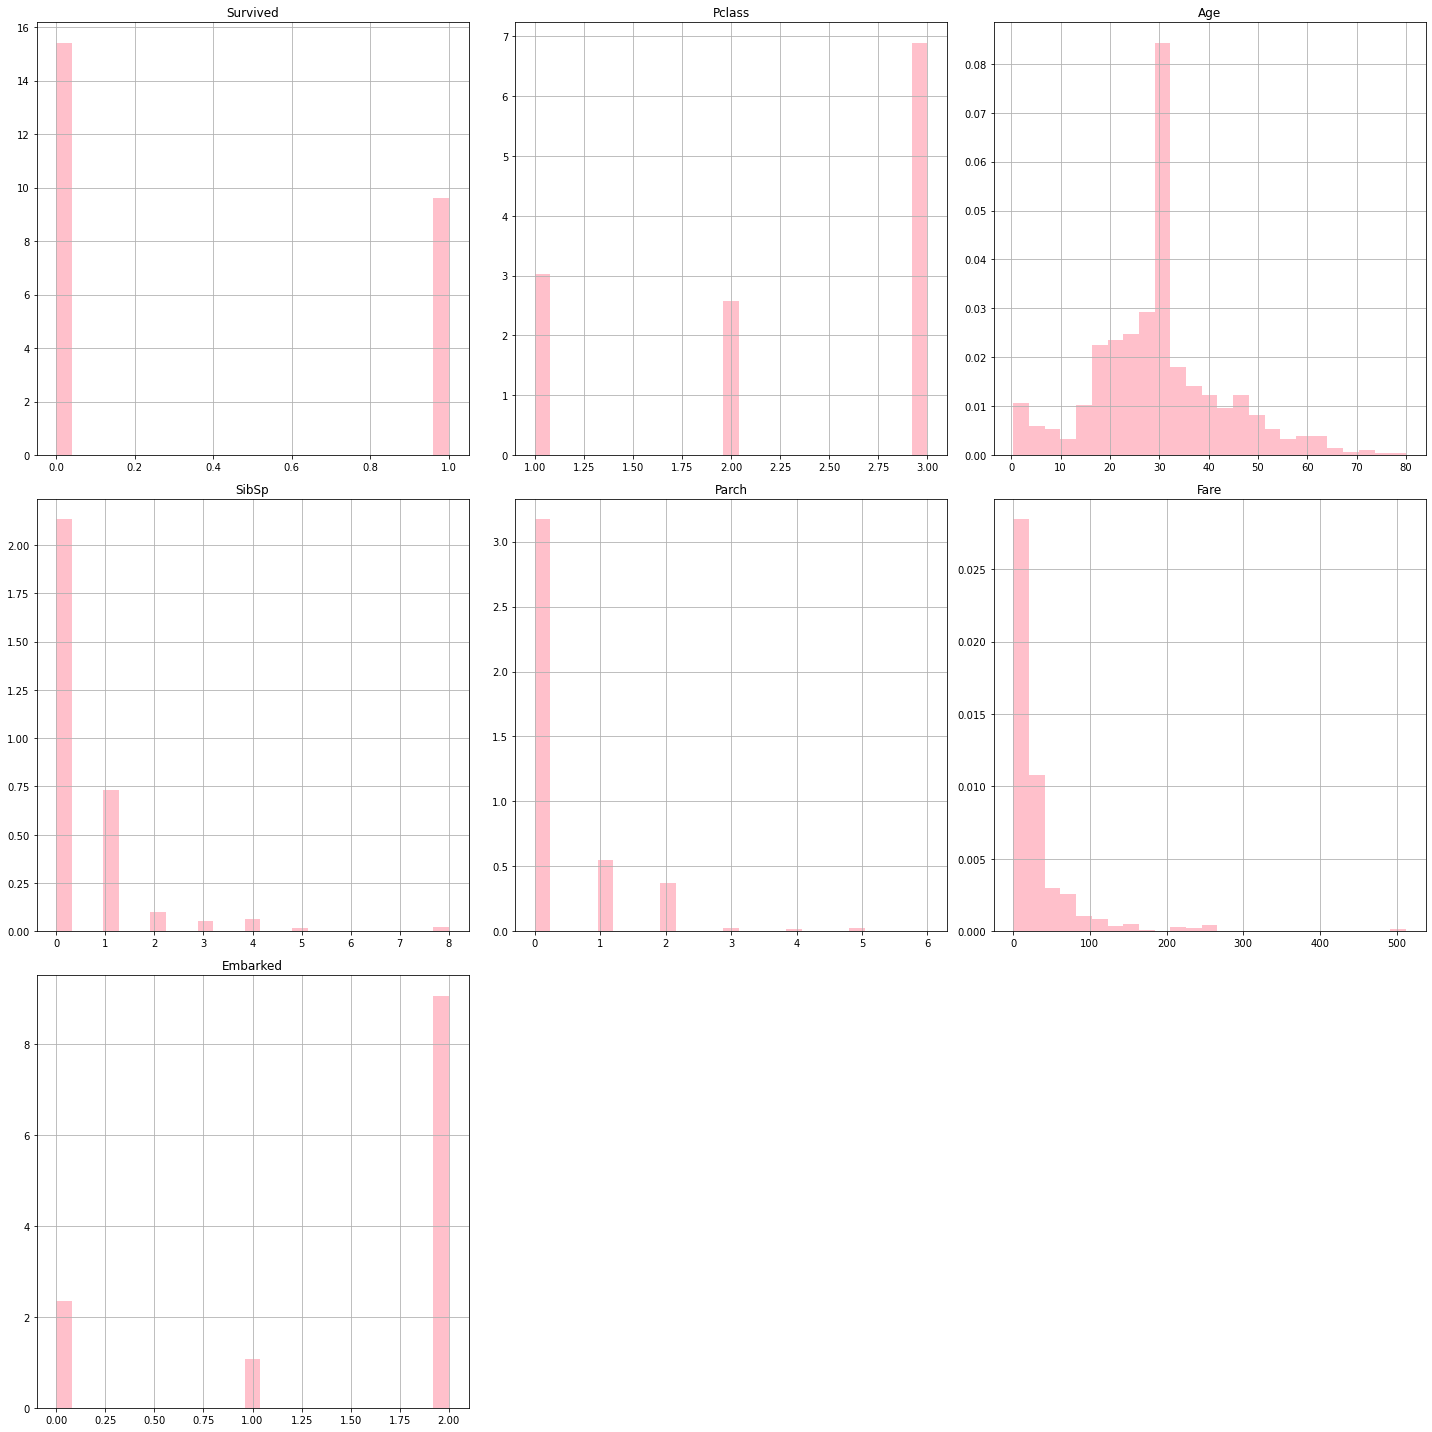

In [57]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='pink',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

# Considering the outliers removal

In [58]:
df.shape

(891, 7)

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
        5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
        4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
        3, 3, 2, 4, 3, 4], dtype=int64))

In [60]:
df_new=df[(z<3).all(axis=1)]

In [61]:
df_new.shape

(820, 7)

In [62]:
# Percentage of data loss

DataLoss=((891-820)/891)*100
DataLoss

7.968574635241302

###### 7.968574635241302% is te=he data lossed during the process of removing Outliers

# Seprating the columns into features and target

In [63]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,0,3,35.0,0,0,8.0500,2


In [64]:
#Independent Variable
y=df.iloc[:,0]

#Dependent Variable 
x=df.iloc[:,1:]

In [65]:
x.shape



(891, 6)

In [66]:
y.shape

(891,)

### Now Lets Whether the data are balanced are Not

In [69]:
from imblearn.over_sampling import SMOTE

smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [70]:
x.shape

(1098, 6)

In [71]:
y.shape

(1098,)

## Transforming data to remove skewness

In [72]:
from sklearn.preprocessing import power_transform

In [73]:
x=power_transform(x,method='yeo-johnson')

In [74]:
x

array([[ 0.93159819, -0.4967026 ,  1.42792695, -0.56938588, -0.95845709,
         0.70170544],
       [-1.38057842,  0.7012397 ,  1.42792695, -0.56938588,  1.23720819,
        -1.62716186],
       [ 0.93159819, -0.18865048, -0.66530803, -0.56938588, -0.87054029,
         0.70170544],
       ...,
       [-1.38057842,  1.70544329,  1.42792695, -0.56938588,  1.03764536,
        -1.62716186],
       [ 0.93159819,  0.09061173,  1.42792695, -0.56938588,  0.21392141,
        -0.92226434],
       [-1.38057842, -0.77391095, -0.66530803, -0.56938588,  0.43564489,
        -0.92226434]])

In [75]:
from sklearn.preprocessing import StandardScaler

#transform my dataset into a standard normal distribution

sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 0.93159819, -0.4967026 ,  1.42792695, -0.56938588, -0.95845709,
         0.70170544],
       [-1.38057842,  0.7012397 ,  1.42792695, -0.56938588,  1.23720819,
        -1.62716186],
       [ 0.93159819, -0.18865048, -0.66530803, -0.56938588, -0.87054029,
         0.70170544],
       ...,
       [-1.38057842,  1.70544329,  1.42792695, -0.56938588,  1.03764536,
        -1.62716186],
       [ 0.93159819,  0.09061173,  1.42792695, -0.56938588,  0.21392141,
        -0.92226434],
       [-1.38057842, -0.77391095, -0.66530803, -0.56938588,  0.43564489,
        -0.92226434]])

In [76]:
x.mean()

-5.39270443048042e-18

In [77]:
x.std()

1.0

# Model Training and testing

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [88]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  156  The model performs very well
At random_state:- 156
Training accuaracy_score is :- 70.5
Testing accuracy_score is:- 70.5 


At random state  344  The model performs very well
At random_state:- 344
Training accuaracy_score is :- 70.5
Testing accuracy_score is:- 70.5 


At random state  549  The model performs very well
At random_state:- 549
Training accuaracy_score is :- 71.4
Testing accuracy_score is:- 71.4 


At random state  766  The model performs very well
At random_state:- 766
Training accuaracy_score is :- 70.5
Testing accuracy_score is:- 70.5 




In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=549)

In [90]:
lr.fit(x_train,y_train)

LogisticRegression()

In [91]:
pred_train=lr.predict(x_train)

In [92]:
pred_test=lr.predict(x_test)

In [93]:
accuracy_score(y_train,pred_train)

0.714123006833713

In [94]:
accuracy_score(y_test,pred_test)

0.7136363636363636

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       116
           1       0.73      0.62      0.67       104

    accuracy                           0.71       220
   macro avg       0.72      0.71      0.71       220
weighted avg       0.72      0.71      0.71       220



# CROSS VALIDATION SCORE FOR LOGISTIC REGRESSION

In [97]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [98]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 70.04678168546782
Accuracy_score is :- 71.36363636363636


At cv:- 5
Cross validation score is :- 70.13989207139892
Accuracy_score is :- 71.36363636363636


At cv:- 6
Cross validation score is :- 70.3096539162113
Accuracy_score is :- 71.36363636363636


At cv:- 7
Cross validation score is :- 70.497655211031
Accuracy_score is :- 71.36363636363636


At cv:- 8
Cross validation score is :- 70.69184385909236
Accuracy_score is :- 71.36363636363636


At cv:- 9
Cross validation score is :- 70.49180327868852
Accuracy_score is :- 71.36363636363636




###### here we will take the value which is very close to cv and acc_score ,at cv 8 the value is very close to accuracy_score

In [99]:
lsscore_selected= cross_val_score(lr,x,y,cv=9).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7049180327868853 
The accuracy_score is: 0.7136363636363636


# AUC ROC CURVE

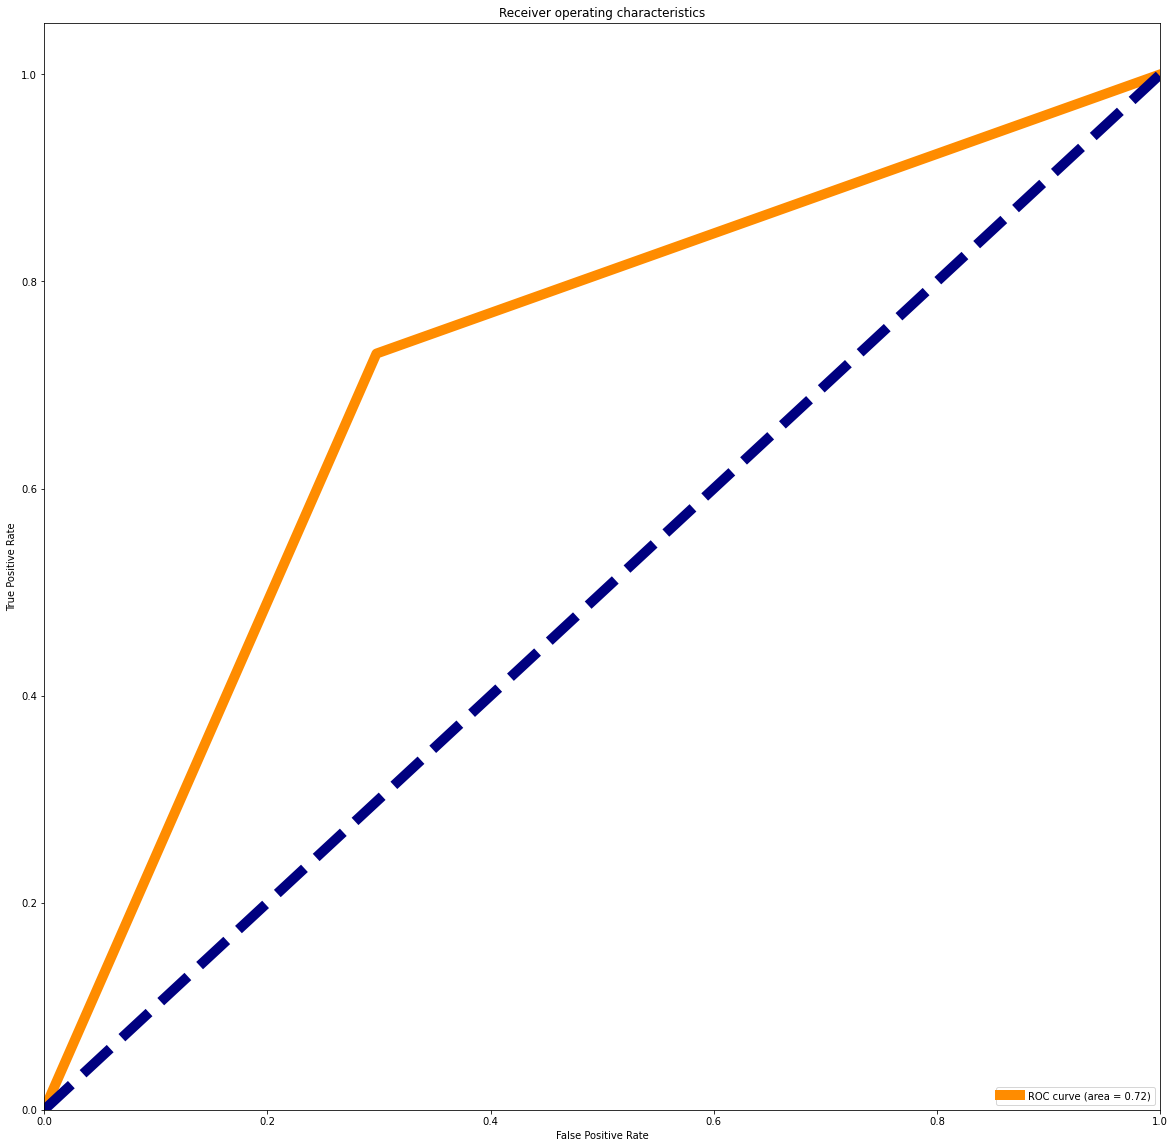

In [101]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

**We can see here the area under roc curve is 72% which is good ..The More the area is under ROC curve the more the model is performing well**

## Lets try with another model

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
gb=GaussianNB()

In [105]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  47  The model performs very well
At random_state:- 47
Training accuaracy_score is :- 68.6
Testing accuracy_score is:- 68.6 


At random state  60  The model performs very well
At random_state:- 60
Training accuaracy_score is :- 68.2
Testing accuracy_score is:- 68.2 


At random state  132  The model performs very well
At random_state:- 132
Training accuaracy_score is :- 68.6
Testing accuracy_score is:- 68.6 


At random state  219  The model performs very well
At random_state:- 219
Training accuaracy_score is :- 68.6
Testing accuracy_score is:- 68.6 


At random state  249  The model performs very well
At random_state:- 249
Training accuaracy_score is :- 68.6
Testing accuracy_score is:- 68.6 


At random state  392  The model performs very well
At random_state:- 392
Training accuaracy_score is :- 67.3
Testing accuracy_score is:- 67.3 


At random state  623  The model performs very well
At random_state:- 623
Training accuaracy_score is :- 68.2
Testing accuracy_score is

###### GaussianNb is not Performing well than Logistic regression so we will not move ahead

In [106]:
from sklearn.tree import DecisionTreeClassifier


In [107]:
dt=DecisionTreeClassifier()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

###### Till 0 to 1000 range there is no random state where training and testing accuracy is equall so we will not go for this because it not not give good result

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train=algorithm_instance.predict(x_train)
    model_1_pred_test=algorithm_instance.predict(x_test)
    print ('accuracy of training model :-',accuracy_score(y_train,model_1_pred_train))
    print ('accuracy of test data :-',accuracy_score(y_test,model_1_pred_test))
    print ('classification report for test data \n', classification_report(y_test,model_1_pred_test))
    print ('classification report for test data \n', classification_report(y_train,model_1_pred_train))
    print ('confusion matrix : \n',confusion_matrix(y_test,model_1_pred_test))

In [111]:
model_selection(dt,x_train,y_train,x_test,y_test)

accuracy of training model :- 0.9669703872437357
accuracy of test data :- 0.7
classification report for test data 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       116
           1       0.69      0.65      0.67       104

    accuracy                           0.70       220
   macro avg       0.70      0.70      0.70       220
weighted avg       0.70      0.70      0.70       220

classification report for test data 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       433
           1       0.98      0.96      0.97       445

    accuracy                           0.97       878
   macro avg       0.97      0.97      0.97       878
weighted avg       0.97      0.97      0.97       878

confusion matrix : 
 [[86 30]
 [36 68]]


In [113]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [114]:
model_selection(kn,x_train,y_train,x_test,y_test)

accuracy of training model :- 0.8029612756264237
accuracy of test data :- 0.7045454545454546
classification report for test data 
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       116
           1       0.67      0.75      0.71       104

    accuracy                           0.70       220
   macro avg       0.71      0.71      0.70       220
weighted avg       0.71      0.70      0.70       220

classification report for test data 
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       433
           1       0.79      0.82      0.81       445

    accuracy                           0.80       878
   macro avg       0.80      0.80      0.80       878
weighted avg       0.80      0.80      0.80       878

confusion matrix : 
 [[77 39]
 [26 78]]


# Lets try with KNeighborsClassifier model

In [115]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  722  The model performs very well
At random_state:- 722
Training accuaracy_score is :- 79.5
Testing accuracy_score is:- 79.5 




In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=722)

In [117]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [118]:
pred_train=kn.predict(x_train)

In [119]:
pred_test=kn.predict(x_test)

In [120]:
accuracy_score(y_train,pred_train)

0.7949886104783599

In [121]:
accuracy_score(y_test,pred_test)

0.7954545454545454

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       105
           1       0.77      0.87      0.82       115

    accuracy                           0.80       220
   macro avg       0.80      0.79      0.79       220
weighted avg       0.80      0.80      0.79       220



# CV of KN

In [124]:
pred_kn=kn.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_kn)


In [126]:
for i in range(4,25):
    lsscore=cross_val_score(kn,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 70.95288652952887
Accuracy_score is :- 79.54545454545455


At cv:- 5
Cross validation score is :- 72.3233706932337
Accuracy_score is :- 79.54545454545455


At cv:- 6
Cross validation score is :- 71.31147540983606
Accuracy_score is :- 79.54545454545455


At cv:- 7
Cross validation score is :- 72.32040782996198
Accuracy_score is :- 79.54545454545455


At cv:- 8
Cross validation score is :- 72.13979688987622
Accuracy_score is :- 79.54545454545455


At cv:- 9
Cross validation score is :- 72.7686703096539
Accuracy_score is :- 79.54545454545455


At cv:- 10
Cross validation score is :- 72.50625521267723
Accuracy_score is :- 79.54545454545455


At cv:- 11
Cross validation score is :- 73.4159779614325
Accuracy_score is :- 79.54545454545455


At cv:- 12
Cross validation score is :- 72.69768275203057
Accuracy_score is :- 79.54545454545455


At cv:- 13
Cross validation score is :- 73.4313725490196
Accuracy_score is :- 79.54545454545455


At cv:- 14
Cross val

## Soo we will not consider KNeighborsClassifier bcz accuracy score and cross_val score difference is not least

# Hyper Parameter tuning

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [128]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls= Lasso()
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [130]:
# Final model training
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

22.52746936201634

In [131]:
pred_ls=ls.predict(x_test)

In [132]:
lss=r2_score(y_test,pred_ls)
lss*100

22.215116059063213

In [133]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

-102.37076064893161

## Soo Lasso is not performing well with the dataset ,The best one so far is linear regression

## Now lets save the model


In [134]:
import pickle
filename='TTP.pkl'
pickle.dump(lr,open(filename,'wb'))

In [135]:
loaded_model=pickle.load(open('TTP.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

69.54545454545455


# ---------------------------------------------------------------------------------------------------------------